### Import Modules

In [216]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt


In [217]:
T = 2000
N = 1000
df = pd.read_parquet('closeprice.parquet')
df_recent = df.tail(T)  # to fix the number of observations 
df_recent_sample_stocks = df_recent.iloc[:, :N]

df_clean = df_recent_sample_stocks.dropna(axis=1)

log_returns = np.log(1 + df_clean.pct_change(1))
# Fill NaN values with forward fill
log_returns = log_returns.fillna(method='bfill')

In [218]:
print(log_returns.isna().sum().sum())
print(np.isinf(log_returns.values).any())

0
False


### To standarize the log returns 

In [219]:
z_scores = log_returns.apply(zscore)

standardized_log_returns = z_scores

### To shuffle each col such that the time dependency is removed

In [220]:
shuffled_standardized_log_returns = standardized_log_returns.apply(np.random.permutation)

### To create the Wishart-Laguerre matrix

In [221]:
H = standardized_log_returns.values
H = np.array(H)
W = (1/T)* np.transpose(H).dot(H)
eigenvalues = np.linalg.eigvals(W)
print(max(eigenvalues), min(eigenvalues))

320.3600598039854 0.033600904886674755


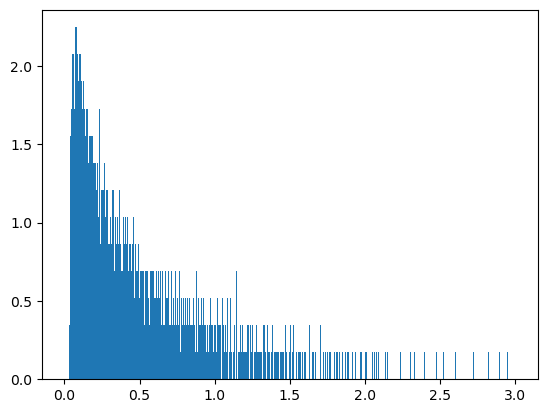

In [222]:
plt.hist(eigenvalues, bins=500, range=(0,3), density=True)
plt.show()

In [223]:
import numpy as np

# Assume `A` is a symmetric matrix
eigenvalues, eigenvectors = np.linalg.eigh(W)

# Create an orthogonal matrix `Q` from the eigenvectors
Q = eigenvectors.T

# Diagonalize `A` using `Q`
D = Q @ Q.T

In [254]:
import numpy as np

# Assume `A` is a matrix

matrix = np.array([[1,2],[2,4]])
U, s, V = np.linalg.svd(matrix)
s

array([5.00000000e+00, 1.04061363e-16])

In [255]:
U

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [256]:
V

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [257]:
eigenvalues, eigenvectors = np.linalg.eigh(matrix)

# Create an orthogonal matrix `Q` from the eigenvectors
Q = eigenvectors.T
eigenvalues

array([0., 5.])

In [258]:
Q

array([[-0.89442719,  0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [226]:
print(np.shape(V))
print(np.shape(U))

(985, 985)
(985, 985)


In [227]:
U.transpose()-V

array([[ 4.19803081e-16,  2.22044605e-16,  3.46944695e-18, ...,
         0.00000000e+00, -1.38777878e-17, -6.93889390e-18],
       [-9.02056208e-16,  8.32667268e-17,  0.00000000e+00, ...,
        -1.35308431e-16, -2.01227923e-16, -1.24032729e-16],
       [ 9.85322934e-16,  2.08166817e-15,  1.17961196e-16, ...,
        -7.63278329e-17, -3.20923843e-17,  9.71445147e-17],
       ...,
       [-5.27355937e-16,  1.79101525e-14, -1.60288449e-15, ...,
         6.76542156e-16,  1.11022302e-16, -5.31259065e-16],
       [ 4.63518113e-15,  7.83054177e-15,  7.32053307e-15, ...,
         1.41726908e-15,  1.22818422e-15,  9.36750677e-17],
       [-5.29784550e-15,  2.58473798e-15,  1.30451205e-15, ...,
        -1.32706346e-15,  3.98119038e-16, -8.18789481e-16]])

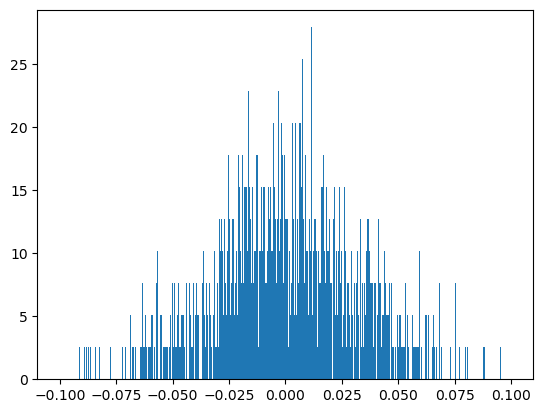

In [228]:
plt.hist(U[0], bins=500, range=(-0.1,0.1), density=True)
plt.show()

In [229]:
V[:,0]

array([-2.31980198e-02, -8.65856552e-02,  1.70656348e-02, -9.76321514e-02,
        3.33320880e-02, -5.52912170e-02,  6.21216420e-03,  9.05918051e-04,
       -1.82501498e-02,  7.99027426e-03, -1.56865618e-02,  1.73978077e-02,
       -5.73458918e-02,  1.15558313e-02, -1.62393303e-02,  4.61406519e-02,
       -4.23262173e-02,  4.61666932e-02, -3.97892930e-02,  2.77780312e-02,
        6.58450447e-02,  4.97682067e-02, -1.61575457e-02,  5.07160226e-02,
       -2.22978058e-02,  2.92341515e-03, -9.90985099e-03,  6.52633476e-02,
       -2.09796055e-02,  1.59065806e-02, -6.47431542e-03,  4.51064126e-02,
       -7.54803112e-03,  2.84812064e-02, -9.86071198e-03, -1.82225198e-02,
        7.31944855e-03,  1.42359806e-02,  4.87830749e-03, -1.20281622e-02,
       -2.52379379e-02,  4.13789389e-02,  1.80787189e-03, -1.79967396e-02,
        6.22364340e-04, -1.92572681e-03,  2.48486528e-02, -4.56856941e-03,
        1.14008833e-02, -1.77825478e-02,  4.18542548e-02, -2.48385462e-02,
        2.88458786e-02, -

In [230]:
import numpy as np
from scipy.stats import describe

# Assume `V` is a NumPy array
stats = describe(V[:,0])

# Print the statistics
print(stats)

DescribeResult(nobs=985, minmax=(-0.09763215137163524, 0.10662495833554798), mean=0.0005339416759347638, variance=0.0010159747791589429, skewness=0.03658444459861048, kurtosis=0.1415216525972145)


In [231]:
import numpy as np

# Assume `V` is a NumPy array
sparsest_vector = V[np.argmax(np.abs(V).sum(axis=0))]

# Print the sparsest vector
print(sparsest_vector)

[-2.40244929e-02  1.33012967e-02 -4.77650205e-02  5.50922904e-03
 -3.59415937e-02 -2.34726597e-02  1.26701108e-02  7.12522745e-02
  2.40217453e-02 -4.47396221e-02  3.07122658e-02 -2.39329939e-02
 -1.42855628e-02  3.41454366e-02  4.19322287e-03  1.82921769e-02
  1.75760865e-02 -2.12784205e-02 -3.07344448e-02 -1.46164724e-02
  2.45975514e-02  4.18372695e-02 -3.86234751e-02 -3.54984277e-02
  1.79936826e-02 -4.07510959e-03 -6.75861023e-02 -2.43731195e-02
  1.77436674e-02 -2.05349687e-02  3.71493206e-03 -5.11417661e-02
  3.40683573e-02 -3.86529010e-02 -3.75167234e-02  1.26057019e-02
  6.00810364e-03 -4.04493474e-02 -2.26609849e-02 -4.75436059e-02
  2.93177816e-03  3.39337024e-02 -5.36717358e-02 -1.79346996e-02
  2.23120507e-02  5.19857295e-02 -2.95856072e-03  1.46188364e-02
  4.88405614e-02 -2.20162617e-02  1.80333238e-02 -4.83855571e-03
  1.52959667e-02 -2.87046390e-02 -3.22288004e-02 -2.84991119e-02
  5.22329296e-02 -2.22429583e-03 -4.55268274e-02  4.36406471e-02
 -2.31372797e-02 -1.21921

In [232]:
# Assume `eigenvalues` is a list of eigenvalues
sublist = list(filter(lambda x: x > 3, eigenvalues))

In [233]:
U[0]-1/N

array([-2.41980198e-02, -8.75856552e-02,  1.60656348e-02, -9.86321514e-02,
        3.23320880e-02, -5.62912170e-02,  5.21216420e-03, -9.40819493e-05,
       -1.92501498e-02,  6.99027426e-03, -1.66865618e-02,  1.63978077e-02,
       -5.83458918e-02,  1.05558313e-02, -1.72393303e-02,  4.51406519e-02,
       -4.33262173e-02,  4.51666932e-02, -4.07892930e-02,  2.67780312e-02,
        6.48450447e-02,  4.87682067e-02, -1.71575457e-02,  4.97160226e-02,
       -2.32978058e-02,  1.92341515e-03, -1.09098510e-02,  6.42633476e-02,
       -2.19796055e-02,  1.49065806e-02, -7.47431542e-03,  4.41064126e-02,
       -8.54803112e-03,  2.74812064e-02, -1.08607120e-02, -1.92225198e-02,
        6.31944855e-03,  1.32359806e-02,  3.87830749e-03, -1.30281622e-02,
       -2.62379379e-02,  4.03789389e-02,  8.07871885e-04, -1.89967396e-02,
       -3.77635660e-04, -2.92572681e-03,  2.38486528e-02, -5.56856941e-03,
        1.04008833e-02, -1.87825478e-02,  4.08542548e-02, -2.58385462e-02,
        2.78458786e-02, -

In [234]:
sublist.__len__()


21

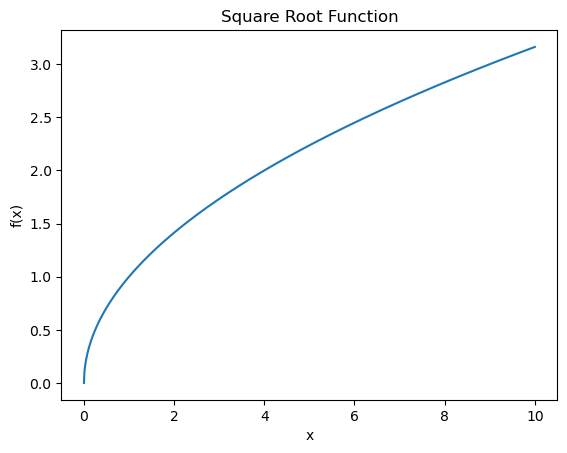

In [235]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot
def f(x):
    return np.sqrt(x)

# Define the range of x values to plot
x = np.linspace(0, 10, 1000)

# Plot the function
plt.plot(x, f(x))

# Add axis labels and a title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Square Root Function')

# Show the plot
plt.show()

In [236]:
print(log_returns.isna().sum().sum())

0


In [237]:
sublist.__len__()

21

In [238]:
import numpy as np

# Check if any value in the DataFrame is infinity
print(np.isinf(log_returns.values).any())

False


In [239]:
import os

In [240]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Print the current working directory
print("Current working directory:", current_dir)

Current working directory: /home/qhalbert/Desktop


In [241]:
os.chdir("/home/qhalbert/Desktop/")